# Actividad 9
# 🔍 Parte 1: Análisis de Lagos Argentinos con Python
Objetivo: Repasar manipulación de datos con Pandas e introducir valores nulos y mapas con Folium.



#  La información de nuestros datos 
* ¿Cómo comunicamos la información analizada sobre los datos?
* ¿Cómo conocemos la composición de los datos?
* ¿Qué recursos podemos usar para comunicar los resultados de los análisis?:
    * Cantidad de lagos por provincia.
    * Cantidad de lagos por tamaño.
  

# ✅ Etapa 1: Exploración Básica (10 min)
* Consigna 1: Cargá el dataset y utiliza las operaciones básicas para conocer el contenido del dataset:
* [Lagos Argentinos](https://archivos.linti.unlp.edu.ar/index.php/s/LBNPS7EdmNSwt8z).
    * Nombre del archivo: lagos_arg.csv
    * Descargado de: https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Lagos
* Cantidad de filas y columans
* Nombres de las columnas
* Tipos de datos de las columnas
* Ver las primeras 10 filas del dataset

In [3]:
!pip install plotly

import pandas as pd
import plotly.express as pl

lagos=pd.read_csv("lagos_arg.csv")

## La cantidad de filas y columnas del dataset

In [6]:
lagos.shape

(52, 11)

## Nombres de las columnas

In [9]:
lagos.columns

Index(['Nombre', 'Ubicación', 'Superficie (km²)', 'Profundidad máxima (m)',
       'Profundidad media (m)', 'Coordenadas', 'Sup Tamaño', 'Latitud en GMS',
       'Longitud en GMS', 'lat', 'lng'],
      dtype='object')

## Tipo de datos de las columnas

In [41]:
lagos.dtypes

Nombre                     object
Ubicación                  object
Superficie (km²)            int64
Profundidad máxima (m)    float64
Profundidad media (m)     float64
Coordenadas                object
Sup Tamaño                 object
Latitud en GMS             object
Longitud en GMS            object
lat                       float64
lng                       float64
dtype: object

## Primeras 10 filas del dataset

In [10]:
lagos.head(10)

,Nombre,Ubicación,Superficie (km²),Profundidad máxima (m),Profundidad media (m),Coordenadas,Sup Tamaño,Latitud en GMS,Longitud en GMS,lat,lng
0,Lago Argentino,Santa Cruz,1435,500.0,150.0,"50°14'53""S 72°38'43""O",grande,"50°14'53""S","72°38'43""O",-50.248056,-72.645278
1,Lago Viedma,Santa Cruz,1166,NaN,NaN,"49°37'27""S 72°29'42""O",grande,"49°37'27""S","72°29'42""O",-49.624167,-72.495000
2,Lago Nahuel Huapi,Río Negro / Neuquén,540,464.0,157.0,"40°51'16""S 71°36'58""O",grande,"40°51'16""S","71°36'58""O",-40.854444,-71.616111
3,Lago Musters,Chubut,427,39.0,20.0,"45°24'53""S 69°11'52""O",grande,"45°24'53""S","69°11'52""O",-45.414722,-69.197778
4,Lago Cardiel,Santa Cruz,358,NaN,49.0,"48°55'3""S 71°12'53""O",grande,"48°55'3""S","71°12'53""O",-48.917500,-71.214722
5,Lago Epecuén,Buenos Aires,156,11.0,7.0,"37°7'45""S 62°51'53""O",grande,"37°7'45""S","62°51'53""O",-37.129167,-62.864722
6,Lago Pellegrini,Río Negro,116,NaN,NaN,"38°42'25""S 67°58'23""O",grande,"38°42'25""S","67°58'23""O",-38.706944,-67.973056
7,Lago Strobel,Santa Cruz,100,NaN,NaN,"48°25'58""S 71°11'25""O",grande,"48°25'58""S","71°11'25""O",-48.432778,-71.190278
8,Lago Fontana,Chubut,84,NaN,79.0,"44°55'17""S 71°29'45""O",grande,"44°55'17""S","71°29'45""O",-44.921389,-71.495833
9,Lago Huechulafquen,Neuquén,84,NaN,142.0,"39°46'28""S 71°30'32""O",grande,"39°46'28""S","71°30'32""O",-39.774444,-71.508889


# ✅ Etapa 2: Análisis por Provincia (15 min)
* ¿En qué provincias hay lagos?
* Cantidad de Lagos por provincia.
* Gráfico de torta sobre la cantidad de lagos provincia.
* Gráfico de barra sobre la cantidad de lagos provincia.

## Cantidad de Lagos por provincia

In [6]:
cantidad=lagos["Ubicación"].value_counts()
cantidad

Ubicación
Santa Cruz                                               16
Neuquén                                                  14
Chubut                                                   13
Río Negro                                                 4
Tierra del Fuego, Antártida e Islas del Atlántico Sur     3
Río Negro / Neuquén                                       1
Buenos Aires                                              1
Name: count, dtype: int64

## Gráfico de torta sobre la cantidad de lagos provincia

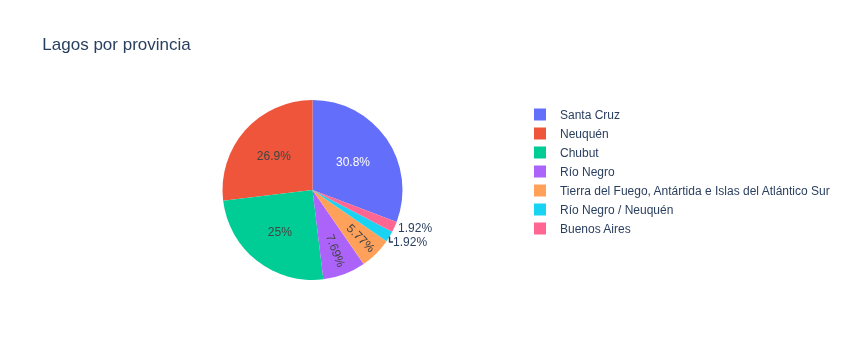

In [10]:
fig=pl.pie(data_frame = cantidad, names = cantidad.index, values= cantidad, title="Lagos por provincia")
fig.show()

## Gráfico de barra sobre la cantidad de lagos provincia

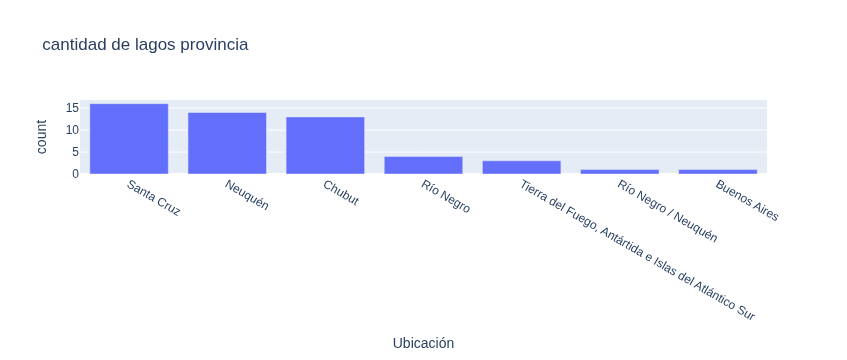

In [11]:
fig=pl.bar(data_frame= cantidad, x= cantidad.index, y= cantidad, title="cantidad de lagos provincia")
fig.show()

## ¿En qué provincias hay lagos?

In [16]:
lagos["Ubicación"].unique()

Ubicación
Santa Cruz                                               16
Neuquén                                                  14
Chubut                                                   13
Río Negro                                                 4
Tierra del Fuego, Antártida e Islas del Atlántico Sur     3
Río Negro / Neuquén                                       1
Buenos Aires                                              1
Name: count, dtype: int64

# ✅ Etapa 3: Filtrar y Limpiar Datos (15 min)
* Mostrar los lagos que son de la provincia de Neuquén. **Nota**: no te olvides de incluir el lago que está compartido con otra provincia, (isin(["Neuquén", "Río Negro / Neuquén"])]
* Mostrar cómo modificaríamos si nos piden  reemplazar el valor de 'Río Negro / Neuquén' **por** 'Neuquén'?
* Filtrá los lagos de Chubut con superficie menor a 10 km². **Nota**: dataframe[(condición1) & (condición2)]

### Mostrar los lagos que son de la provincia de Neuquén

In [67]:
def lp (provincia):
    lp2=lagos[lagos["Ubicación"]==provincia]
    return lp2

In [68]:
lp("Neuquén")

,Nombre,Ubicación,Superficie (km²),Profundidad máxima (m),Profundidad media (m),Coordenadas,Sup Tamaño,Latitud en GMS,Longitud en GMS,lat,lng
9,Lago Huechulafquen,Neuquén,84,NaN,142.0,"39°46'28""S 71°30'32""O",grande,"39°46'28""S","71°30'32""O",-39.774444,-71.508889
10,Lago Traful,Neuquén,78,NaN,NaN,"40°37'50""S 71°24'55""O",grande,"40°37'50""S","71°24'55""O",-40.630556,-71.415278
14,Lago Aluminé,Neuquén,58,165.0,64.0,"38°55'18""S 71°7'35""O",medio,"38°55'18""S","71°7'35""O",-38.921667,-71.126389
15,Lago Lácar,Neuquén,53,277.0,166.0,"40°9'45""S 71°26'11""O",medio,"40°9'45""S","71°26'11""O",-40.162500,-71.436389
23,Lago Espejo,Neuquén,40,NaN,NaN,"40°40'33""S 71°42'40""O",medio,"40°40'33""S","71°42'40""O",-40.675833,-71.711111
27,Lago Lolog,Neuquén,37,NaN,NaN,"40°2'10""S 71°32'11""O",medio,"40°2'10""S","71°32'11""O",-40.036111,-71.536389
29,Lago Tromen,Neuquén,29,NaN,69.0,"39°31'33""S 71°26'52""O",medio,"39°31'33""S","71°26'52""O",-39.525833,-71.447778
31,Lago Quillén,Neuquén,26,NaN,NaN,"39°24'41""S 71°18'52""O",medio,"39°24'41""S","71°18'52""O",-39.411389,-71.314444
34,Lago Moquehue,Neuquén,21,NaN,NaN,"38°54'16""S 71°16'26""O",medio,"38°54'16""S","71°16'26""O",-38.904444,-71.273889
35,Lago Correntoso,Neuquén,20,NaN,NaN,"40°42'8""S 71°39'35""O",medio,"40°42'8""S","71°39'35""O",-40.702222,-71.659722


## Mostrar cómo modificaríamos si nos piden  reemplazar el valor de 'Río Negro / Neuquén' **por** 'Neuquén'?

In [53]:
col_replace = {'Río Negro / Neuquén': 'Neuquén'}
lag_m = lagos.copy()
lag_m["Ubicación"] = lag_m["Ubicación"].replace(col_replace)
lagos_ar = lag_m["Ubicación"].value_counts()
print(lagos_ar)

Ubicación
Santa Cruz                                               16
Neuquén                                                  15
Chubut                                                   13
Río Negro                                                 4
Tierra del Fuego, Antártida e Islas del Atlántico Sur     3
Buenos Aires                                              1
Name: count, dtype: int64


## Filtrá los lagos de Chubut con superficie menor a 10 km²

In [72]:
chubut=lp("Chubut")
superficiechu=chubut[chubut['Superficie (km²)']<=10]
superficiechu

,Nombre,Ubicación,Superficie (km²),Profundidad máxima (m),Profundidad media (m),Coordenadas,Sup Tamaño,Latitud en GMS,Longitud en GMS,lat,lng
49,Lago Pico Nº 1,Chubut,10,NaN,NaN,"44°14'31""S 71°30'8""O",chico,"44°14'31""S","71°30'8""O",-44.241944,-71.502222
51,Lago Rosario,Chubut,10,57.0,25.0,"43°15'36""S 71°20'48""O",chico,"43°15'36""S","71°20'48""O",-43.260000,-71.346667


# ✅ Etapa 4: Valores Nulos y Estadísticas (10 min)
* ¿Qué podemos analizar sobre los valores de la profundidad máxima y media de los lagos?
* ¿Entre qué valores están ambas mediciones? **Nota**: describe().
* Realicemos un gráfico de barras para comparar **Profundidad máxima** y **Profundidad media** de los lagos.
    
* ¿Hay valores nulos? **Nota**: info().
* Investigar sobre gráficos tipo scatter o dispersión.

## ¿Qué podemos analizar sobre los valores de la profundidad máxima y media de los lagos?


##  ¿Entre qué valores están ambas mediciones?

## Realicemos un gráfico para comparar **Profundidad máxima** y **Profundidad media** de los lagos.

In [ ]:
import plotly.express as px
fig = px.bar(completar, 
             x="Nombre", 
             y=["nombre columna1", "nombre columna2"],
             barmode='group',
             title="Comparación de Profundidades de Lagos",
             labels={"value": "Metros", "variable": "Tipo de Profundidad"},
             color_discrete_sequence=["#1E90FF", "#00BFFF"])

fig.show()

¿Qué pasa en con los datos de algunos lagos?

## ¿Hay valores nulos? **Nota**: info()

## Gráfico de dispersión

¿Qué datos compara este gráfico?

In [ ]:
fig = px.scatter(lagos, 
                 x="Profundidad media (m)", 
                 y="Superficie (km²)",
                 
                 title="Relación: Profundidad Media vs. Superficie")  

fig.update_traces(textposition='top center', marker=dict(size=12))
fig.show()

Modificar el gráfico para que compare la longitud y la Superficie.

# ✅ Etapa 5: Visualización con Mapas (15 min)
* Otro recurso para visualizar datos geolocalizados son los mapas.
* Mostrar todos los lagos en un mapa.
* Mostrar los lagos de Chubut solamente.
* Mostrar los lagos con color según su tamaño.
* Mostrar los datos de otro dataset.


## La librería folium nos permite mostrar datos en mapas

In [43]:
import folium

* ¿Qué datos nos indican un punto geográfico en un mapa?
* ¿En qué columnas están estos datos?

## 📌 Paso 1.Vamos a generar un mapa **base** para luego agregar los puntos
* Esta función configura un mapa para mostrar de la República Argentina, realizados por [Instituto Geográfico Nacional](https://www.ign.gob.ar/)
* ¿Sabemos qué es una funciòn?

In [44]:
def generar_mapa():
    attr = (
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
    )
    
    tiles = 'https://wms.ign.gob.ar/geoserver/gwc/service/tms/1.0.0/capabaseargenmap@EPSG%3A3857@png/{z}/{x}/{-y}.png'
    m = folium.Map(
        location=(-33.457606, -65.346857),
        control_scale=True,
        zoom_start=5,
        name='es',
        tiles=tiles,
        attr=attr
    )
    return m

Usamos la función **generar_mapa** para tener nuestro mapa base

In [49]:
generar_mapa()

La variable **mapa** es nuestro mapa **base**

## 📌 Paso 2. Definimos la función para poder agregar los puntos:
En la celda de abajo pusimos el código de la función que permnite agregar los puntos:

* la función **agregar_marca_lago** recibe cada fila e indicamos  los puntos que se encuentran en las columnas de las **coordenadas** de esta forma.
```python
[row['latitud'], row['longitud']],
```
* queremos que muestre el nombre del lago cuando hacemos clic sobre cada icono, ponemos el nombre de la columna **Nombre**,  donde se encuentra **ese dato**.
```python
popup=row['Nombre']
```


In [12]:
def agregar_marca_lago(row):
    folium.Marker(
        [row['completar'], row['completar']],
        popup=row['Nombre'],
        icon=folium.Icon()
        ).add_to(mapa)



## 📌 Paso 3. Agregamos los puntos al mapa:

En la celda de abajo pusimos el código para poder agregar los puntos,  lo más importante para tener en cuenta:
* el nombre de la variable que contiene los datos de los lagos **lagos** y para que agregue los puntos usamos:
    * ```python
      lagos.apply(nombre_funcion, axis=1)
      ```
* por úlitmo, mostramos el mapa, escribiendo el nombre de la variable del mapa.

In [ ]:
lagos.apply(agregar_marca_lago, axis=1)
mapa

## Mostrar en un mapa los lagos de Chubut

## Mostrar los lagos con iconos de colores según su tamaño

* ¿En qué columna están con valores categorizados los tamaños de los lagos?
* ¿Cuáles son los tamaños?

In [50]:
def agregar_marca_lago(row):
    colores = {'tamaño1': 'red', 'tamaño2': 'blue', 'tamaño3': 'green'}
    color = colores.get(row['Sup Tamaño'], 'gray')
    folium.CircleMarker( 
        location=[row['lat'], row['lng']],
        radius=6,
        color=color,
        fill=True,
        popup=row['Nombre']
        ).add_to(mapa)


In [51]:
lagos.apply(agregar_marca_lago, axis=1)
mapa